# COVID-19 Prediction Using Linear Regression

This notebook builds a linear regression model to predict new daily COVID-19 cases in India for the next 7 days.


## Objective

- Predict new daily COVID-19 cases using a simple time-based feature (`Day`)
- Visualize predictions vs. actual cases
- Evaluate the model using MAE and RMSE


## Load and Filter Data

We use a cleaned COVID-19 dataset and filter rows only for India.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [38]:
df = pd.read_csv('covid.csv')
india_df = df[df['Country/Region'] == 'India'].copy()

## Feature Engineering

Create a `Day` column as the numeric feature to model the timeline.


In [39]:
india_df['Day'] = range(1,len(india_df)+1)

## Define Features and Target

We use `Day` as our feature (`X`) and `New cases` as our target (`y`).

In [40]:
X = india_df[['Day']]
y=india_df['New cases']

## Train/Test Split

We use the last 7 days of data as our test set.

In [41]:
X_train = X[:-7]
X_test = X[-7:]
y_train = y[:-7]
y_test = y[-7:]


## Model Training

We train a simple Linear Regression model on the training data.

In [42]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Prediction

We predict on the test set using the trained model.

In [43]:
y_pred = model.predict(X_test)

## Actual vs Predicted Plot

This scatterplot shows how close the predictions are to the actual values.

Text(0.5, 1.0, 'Actual vs Predicted COVID-19 Cases')

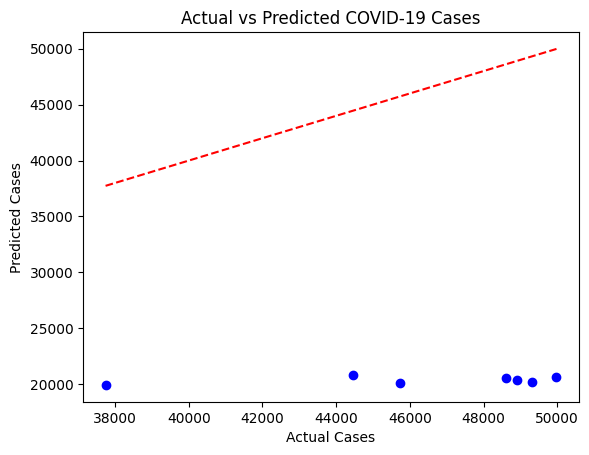

In [44]:
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--')
plt.xlabel('Actual Cases')
plt.ylabel('Predicted Cases')
plt.title('Actual vs Predicted COVID-19 Cases')


## Evaluation Metrics

We use MAE and RMSE to evaluate model accuracy.

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 26004.44
RMSE: 26288.63


### 📈 Actual vs Predicted COVID-19 Cases

The chart below shows how close our model's predictions are to real case numbers over the last 7 days.

- The red shaded area represents the prediction error.
- Smaller shaded regions indicate better prediction accuracy.


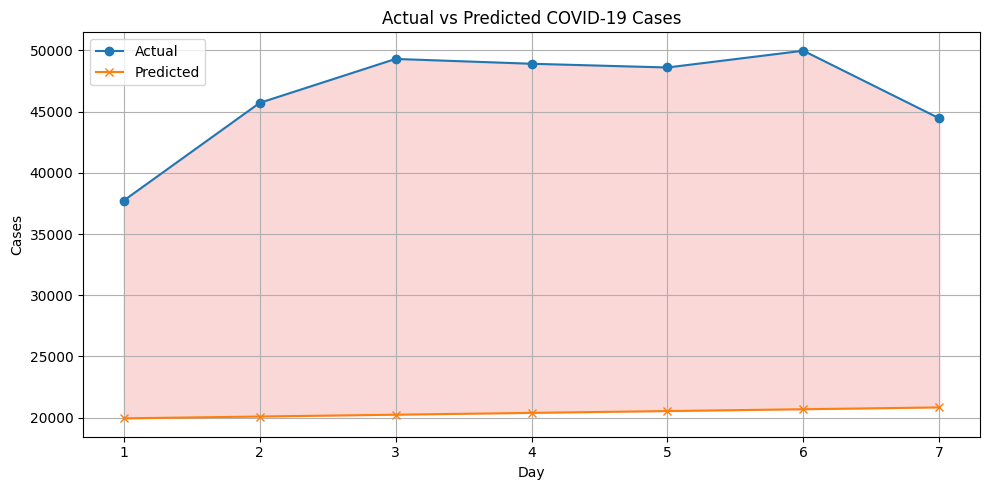

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Create Day index (if not already present)
days = list(range(1, len(y_test) + 1))

# Ensure values are numeric and convert to arrays
y_test_array = np.array(y_test).astype(float)
y_pred_array = np.array(y_pred).astype(float)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(days, y_test_array, label='Actual', marker='o')
plt.plot(days, y_pred_array, label='Predicted', marker='x')
plt.fill_between(days, y_test_array, y_pred_array, color='lightcoral', alpha=0.3)

plt.title('Actual vs Predicted COVID-19 Cases')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
